# Level-A

## Problem Statement : Credit Card Fraud Detection

![Image](https://www.cardrates.com/wp-content/uploads/2020/08/shutterstock_576998230.jpg)

*   Using machine learning algorithms, predict the instances of Credit Card Fraud. We are particularly interested in your choice of approach, algorithms, preprocessing, and your understanding of the data itself.
*    A Training program should create a machine learning model as a file for output.
*    Training program should also write its accuracy results to file. (Choice of accuracy metric is important)
*    Another Program should then read the created model file, and use it to predict evaluation data.


#### About The Data Set
        It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

[Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

### Import Necessary Libraries

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, precision_recall_curve,accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve, auc

##### Import the Dataset

In [387]:
data=pd.read_csv("D:\\Assignment\\Dataset\\creditcard.csv")

In [388]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [389]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [390]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


### Missing Values Handling

In [391]:
missing_value= data.isnull().sum()
percentage = 100 * data.isnull().sum() / len(data)
data_types = data.dtypes
missing_values_table = pd.concat([missing_value, percentage, data_types], axis=1)
miss_val = missing_values_table.rename(columns = {0 : 'Missing Values',1 : 'Percentage',2: 'Data Types'})
miss_val.style.background_gradient(cmap = "plasma")

,Missing Values,Percentage,Data Types
Time,0,0.000000,float64
V1,0,0.000000,float64
V2,0,0.000000,float64
V3,0,0.000000,float64
V4,0,0.000000,float64
V5,0,0.000000,float64
V6,0,0.000000,float64
V7,0,0.000000,float64
V8,0,0.000000,float64
V9,0,0.000000,float64


There are No missing values were found in the dataset

## EXPLORATORY DATA ANALYSIS

In [392]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Univariate Analysis

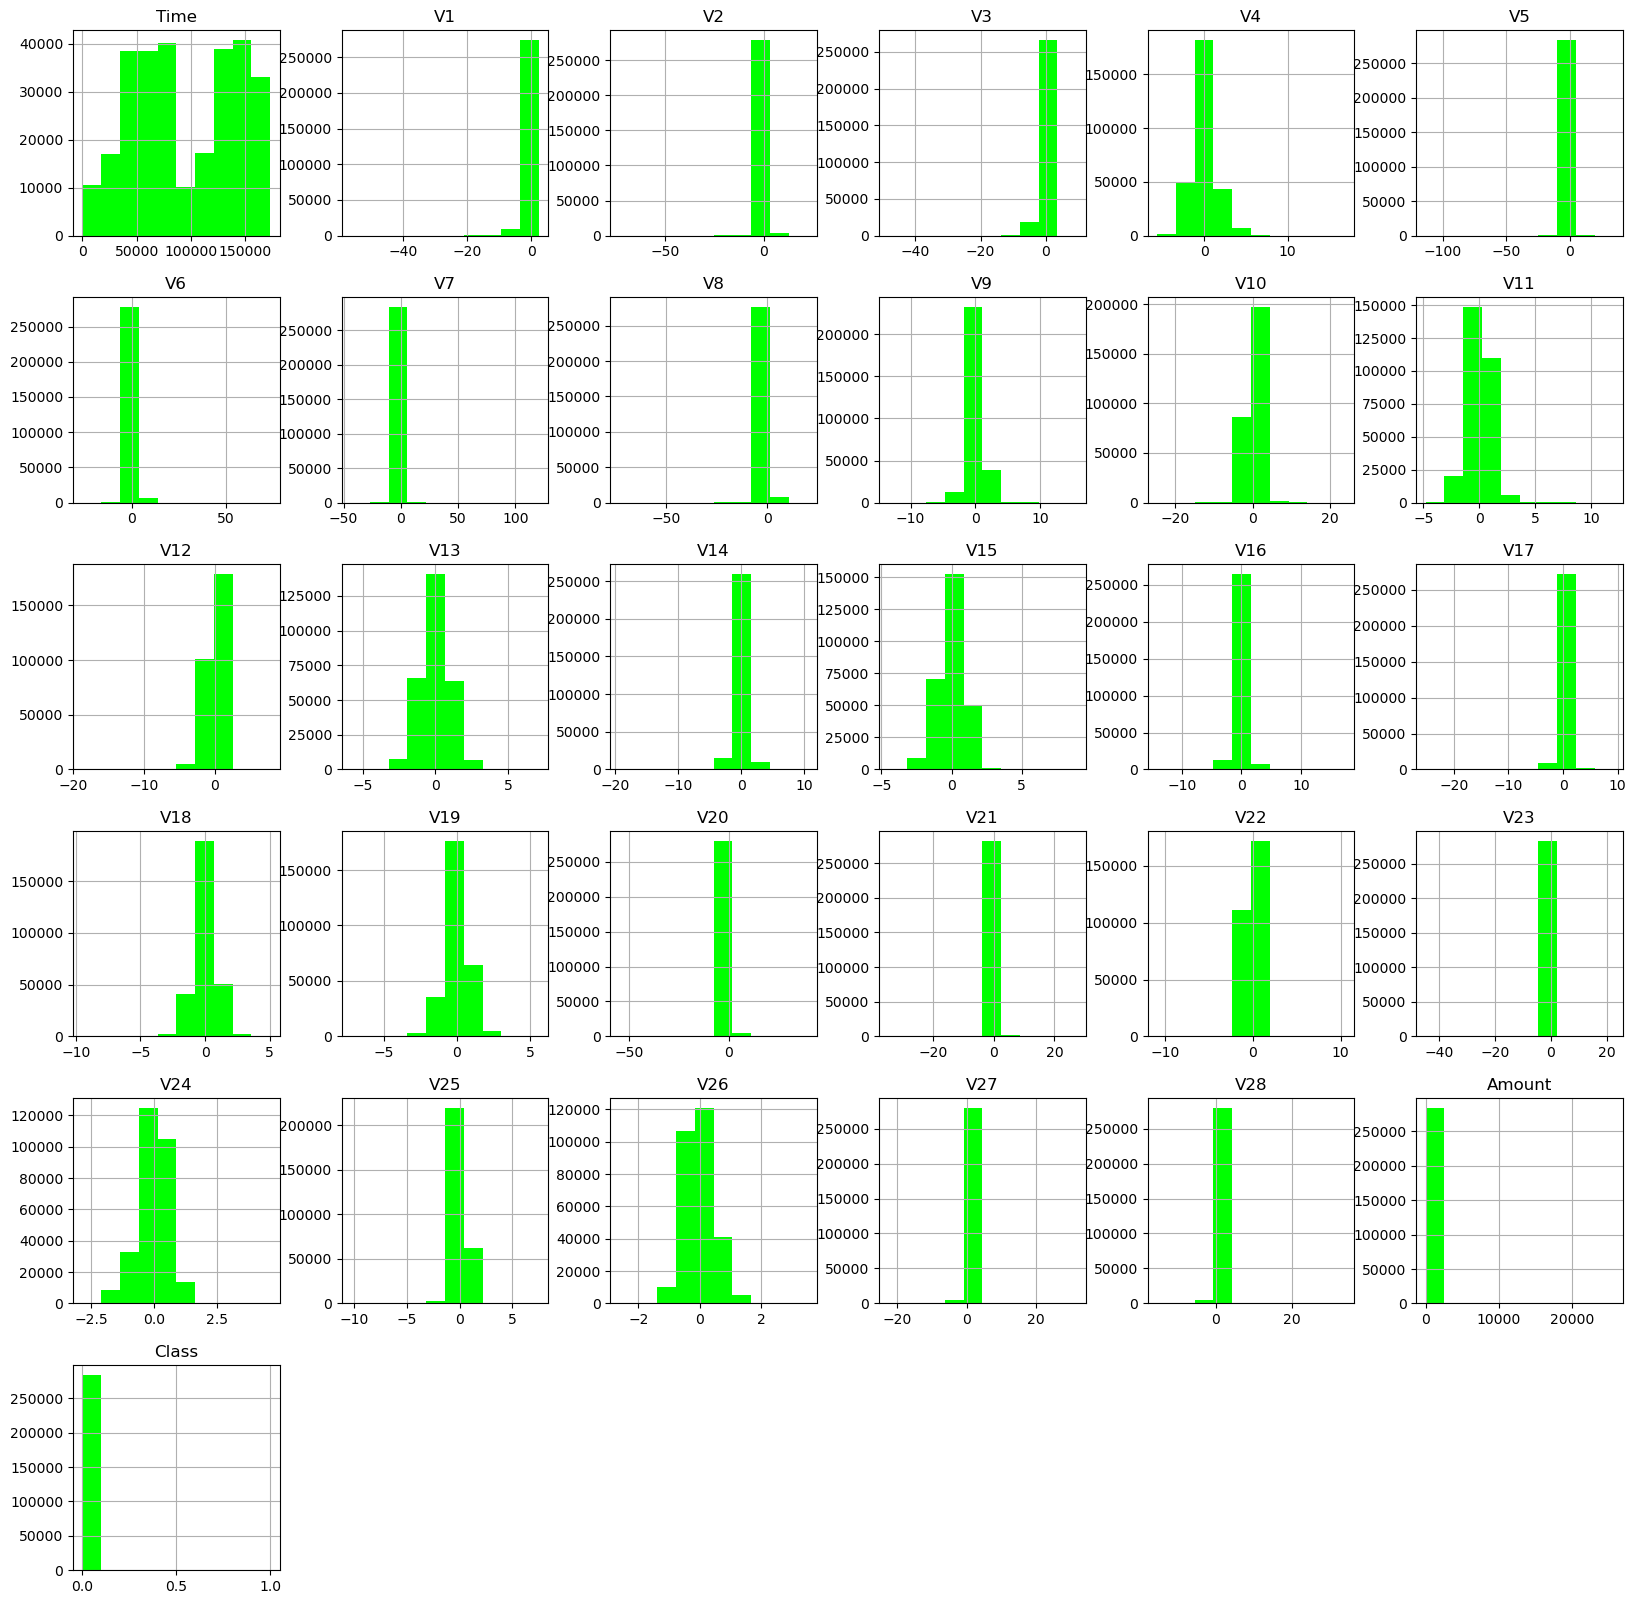

In [393]:
data.hist(figsize=(20,20),color='lime')
plt.show()

#### Time

In [394]:
data_fraud = data[data['Class'] == 1]
data_non_fraud = data[data['Class'] == 0]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


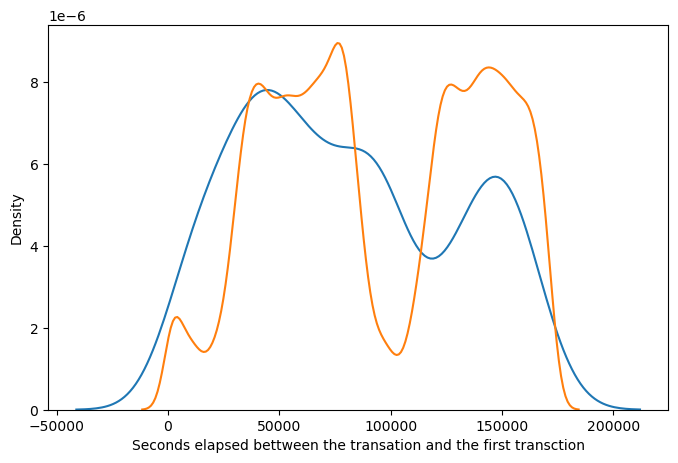

In [395]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraud',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraud',hist=False)
ax.set(xlabel='Seconds elapsed bettween the transation and the first transction')
plt.show()

In [396]:
data.drop('Time', axis=1, inplace=True)

In [397]:
data.shape

(284807, 30)

In [398]:
data.duplicated().any()

True

In [399]:
data = data.drop_duplicates()

In [400]:
data.shape

(275663, 30)

In [401]:
284807- 275663

9144

We may witness a large majority of Class 0 (non fraudulent) . employing the histogram analysis, which is a different truncation of the distribution on the average value for all column attributes

In [402]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

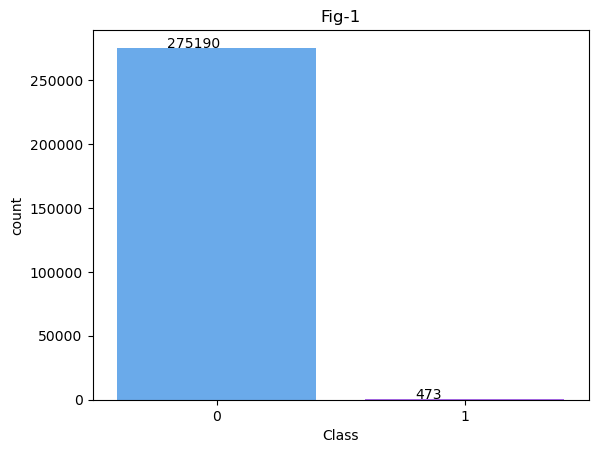

In [403]:
ax1=sns.countplot(data=data,x='Class',palette='cool')
plt.title('Fig-1')
for p in ax1.patches:
   ax1.annotate('{:}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.01))

The difference between the two classes of transactions in this graph demonstrates how much fewer fraudulent transactions there are overall than authorised ones.

#### Amount

Text(0.5, 1.0, 'Fig-2')

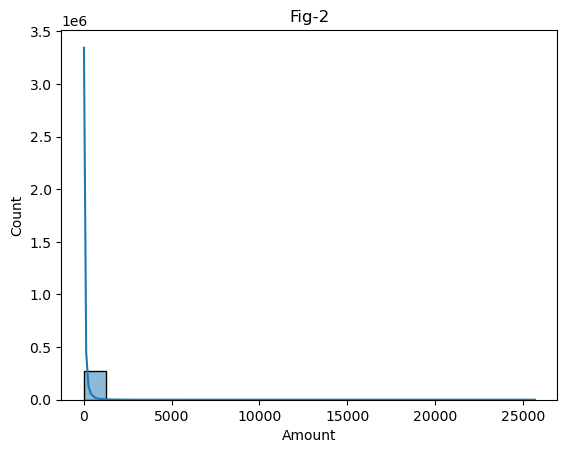

In [404]:
sns.histplot(data=data,x='Amount',bins=20,kde=True)
plt.title('Fig-2')

### Outliers treatment

Text(0.5, 1.0, 'Fig-3')

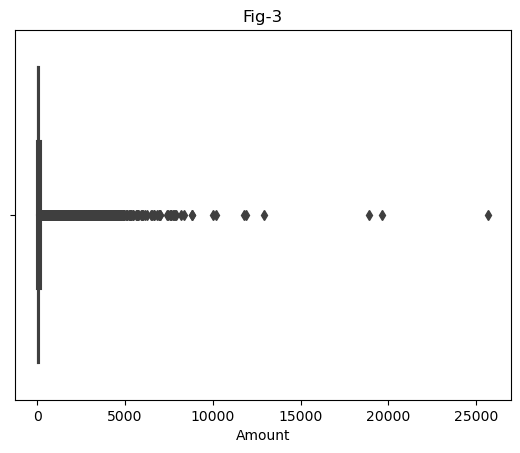

In [405]:
sns.boxplot(data=data,x='Amount')
plt.title('Fig-3')

In [406]:
data_fraud = data[data['Class'] == 1]
data_non_fraud = data[data['Class'] == 0]

### classes with amount

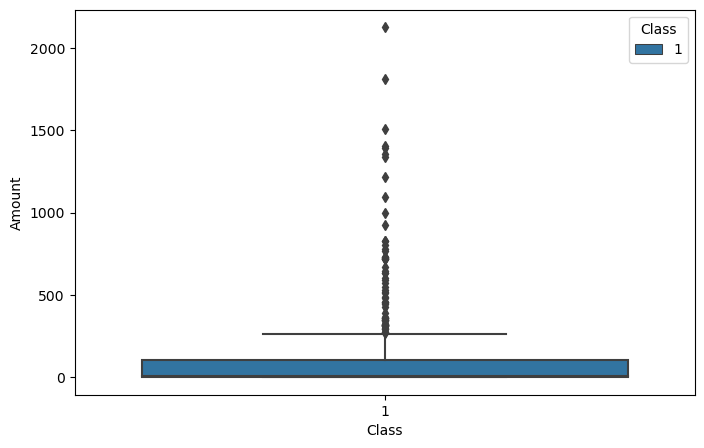

In [407]:
plt.figure(figsize=(8,5))
x = sns.boxplot(x=data_fraud['Class'],y=data_fraud['Amount'],hue='Class',data=data_fraud)
plt.legend
plt.show();

We can see that the fraud transctions are mostly densed in the lower range of amount, whereas the non-fraud transctions are spreaded throughout low to high range of amount

### Correlation

<AxesSubplot:>

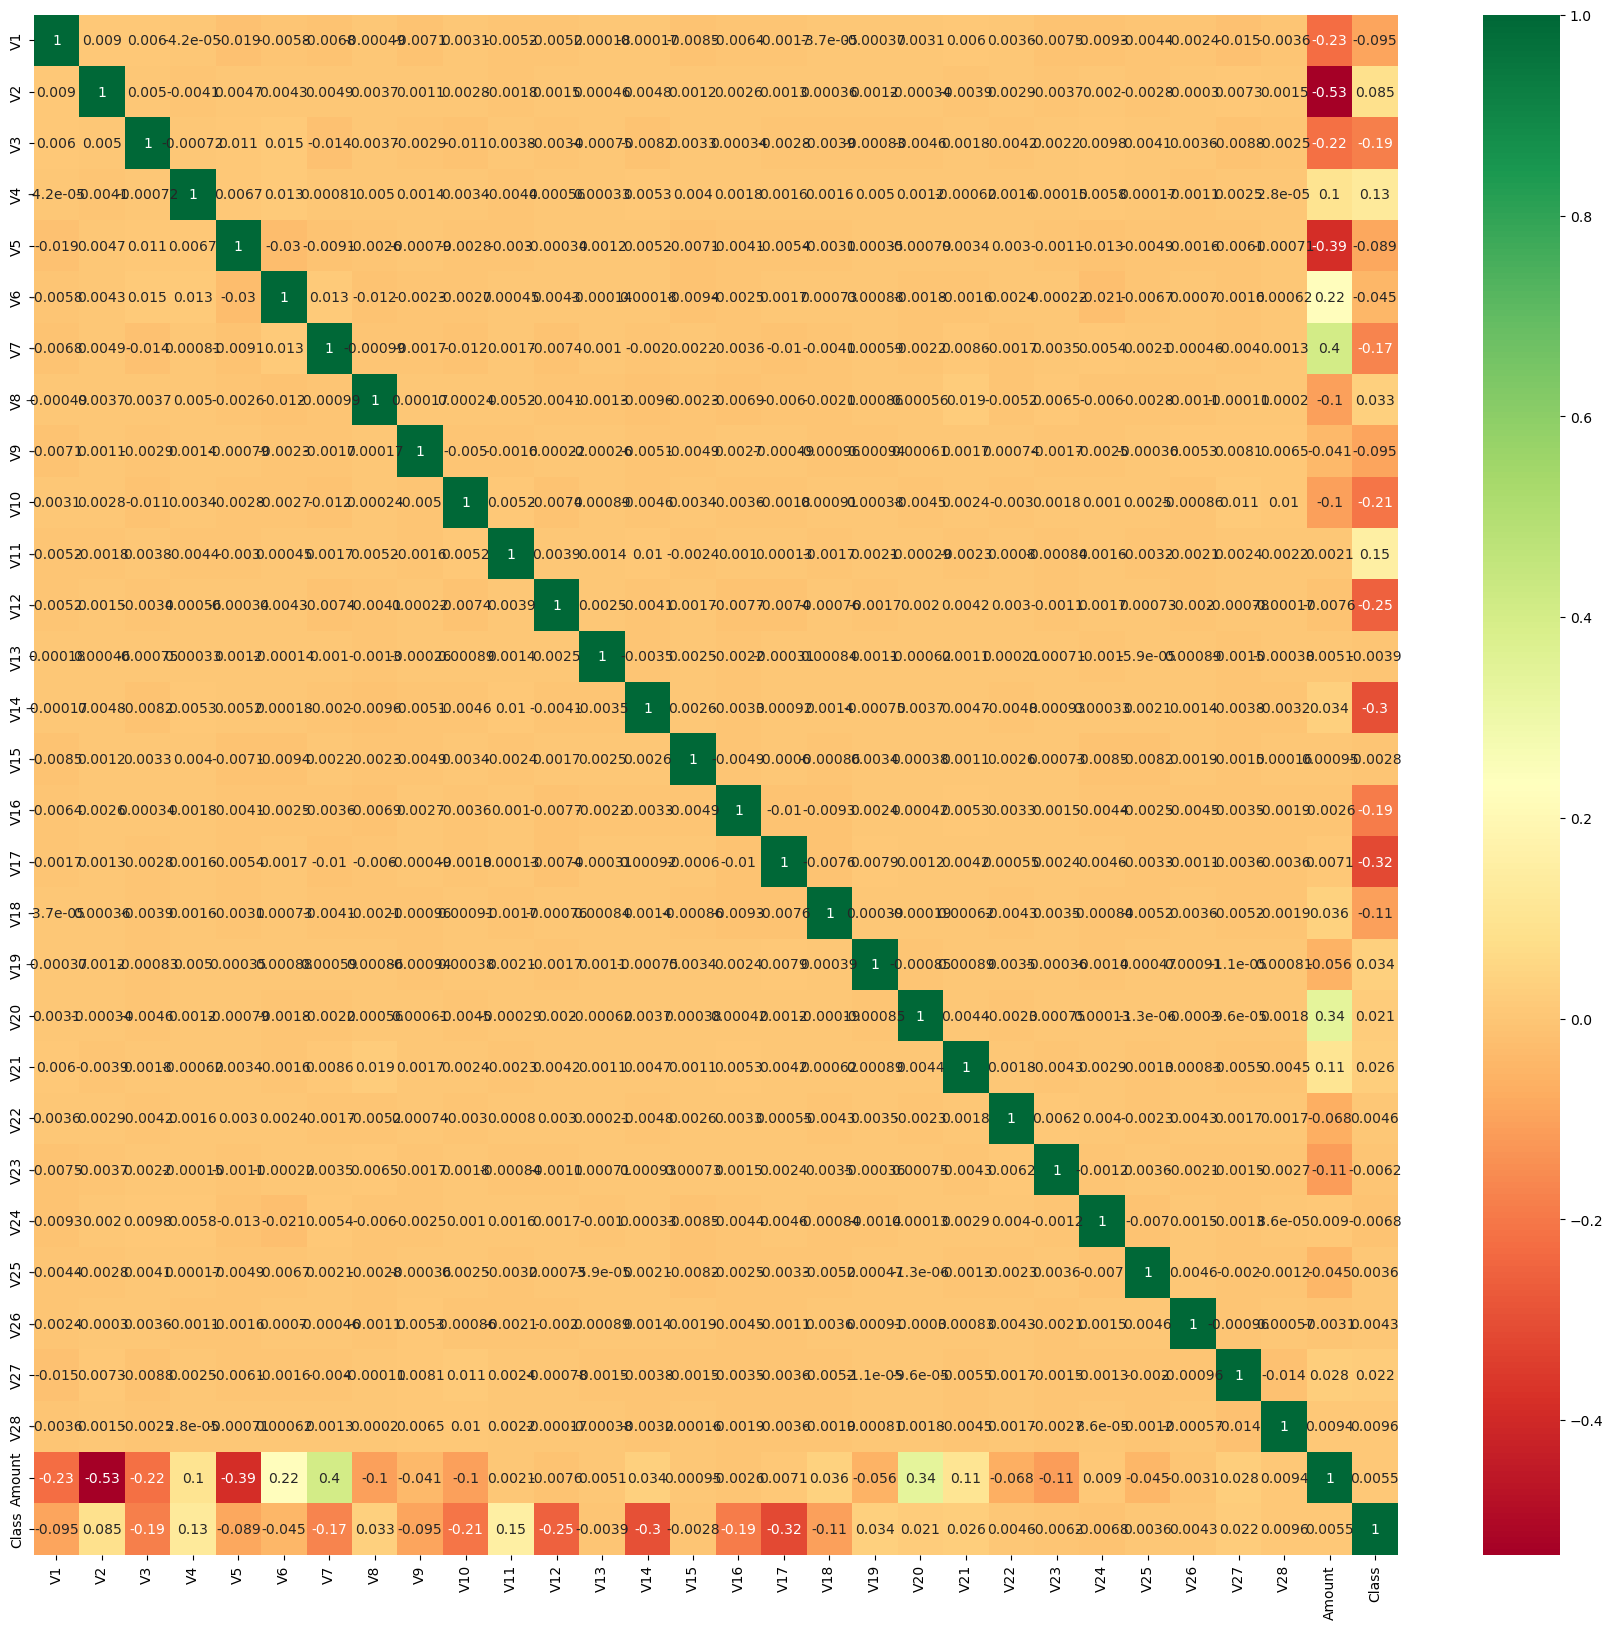

In [408]:
correlation=data.corr()
top_corr_features=correlation.index
plt.figure(figsize=(22,20))
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

The Number of feature to the correlate into the function on the related the differnt columns 

## Pre-processing

In [409]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1)) # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)

In [410]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.233169
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.347092
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.137702
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.130015
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.081308


In [411]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [412]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


### Spliting the dataset

In [413]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [414]:
X_train.shape

(192964, 29)

In [415]:
X_test.shape

(82699, 29)

## Applying Machine Learning Algorithms

* Let's apply different Machine Learning Algorithms then compare their metrics to select the most suitable ML algorithm. Algorithms to be used are:


*  Random Forest 
*  Decision Tree
*  Logistic Regression

### Random Forest

In [416]:
from sklearn.ensemble import RandomForestClassifier

In [417]:
random_forest = RandomForestClassifier(n_estimators=100) 

In [418]:
random_forest.fit(X_train,y_train.values.ravel()) 

RandomForestClassifier()

In [419]:
y_pred = random_forest.predict(X_test)

In [420]:
random_forest.score(X_test,y_test)

0.9994921341249592

In [421]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[82556     6]
 [   36   101]]


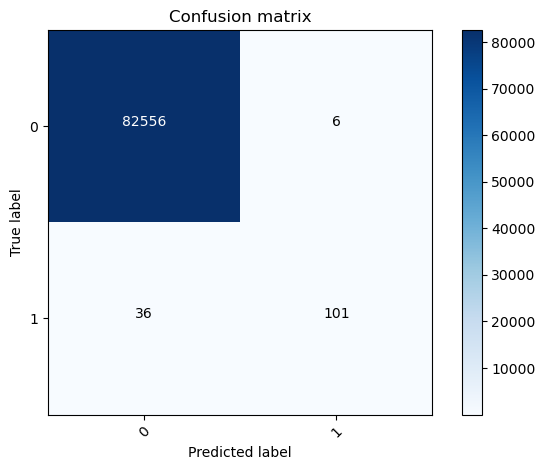

In [422]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [423]:
yhat = random_forest.predict_proba(X_test)
pos_probs = yhat[:, 1]

In [424]:
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
auc_score = auc(recall, precision)
print('PR AUC: %.3f' % auc_score)

PR AUC: 0.794


Using the AUC Curve to Determine Accuracy Scores

In [425]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9995 	precision:0.9439 	recall:0.7372 	F1-score:0.8279


In [426]:
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999492,0.262774,0.737226,0.943925,0.827869


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


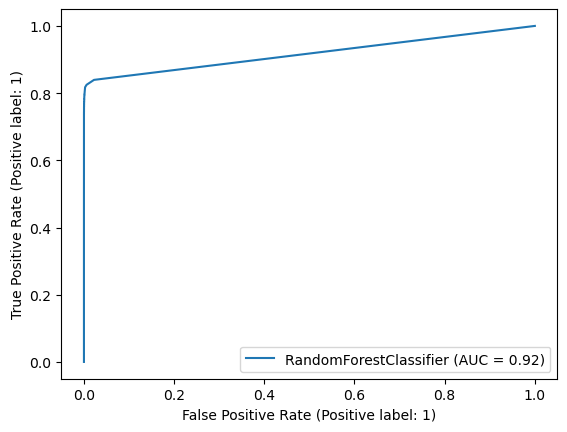

In [427]:
ROC_RF = plot_roc_curve(random_forest, X_test, y_test)
plt.show()

Confusion matrix, without normalization
[[275184      6]
 [    36    437]]


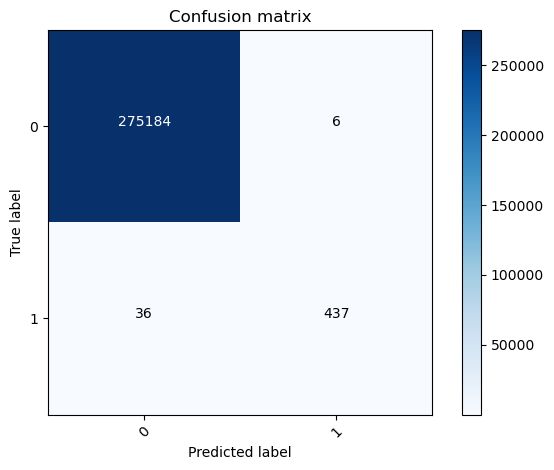

In [428]:
y_pred = random_forest.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [429]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9998 	precision:0.9865 	recall:0.9239 	F1-score:0.9541


In [430]:
results_fullset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999848,0.07611,0.92389,0.986456,0.954148


#### Inference

* The Based on the Randomforest model to While only 6 regular transactions are incorrectly forecasted as fraudulent, the model only detects 76% of the fraudulent transactions, according to the based on the model to the fraud and non-fraud transaction to the based on the model building.
* Hence, 33 fraudulent transactions go undetected (False Negatives).
* See if we can boost this performance with other  machine learning models in the remaining notebook.


### Decision Tree

In [431]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [432]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [433]:
y_pred = decision_tree.predict(X_test)

In [434]:
decision_tree.score(X_test,y_test)

0.999153556874932

Confusion matrix, without normalization
[[82529    33]
 [   37   100]]


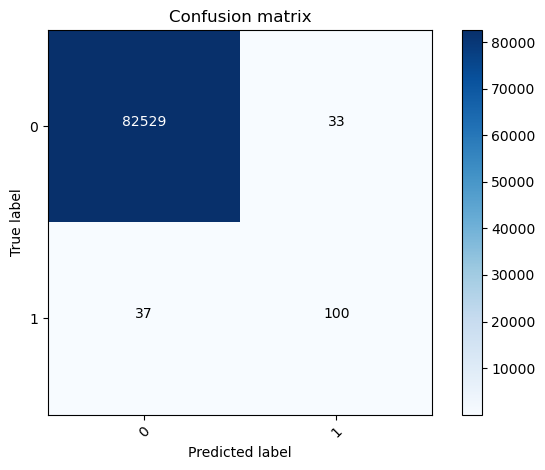

In [435]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

The performance of the Decision Tree model is below the one using Random Forest. Let's check the performance indicators.

In [436]:
yhat = decision_tree.predict_proba(X_test)
pos_probs = yhat[:, 1]
print('PR AUC: %.3f' % auc_score)

PR AUC: 0.794


In [437]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [438]:
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

C:\Users\Manic\AppData\Local\Temp\ipykernel_15128\3775471795.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_testset = results_testset.append(model_results, ignore_index = True)


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999492,0.262774,0.737226,0.943925,0.827869
1,DecisionTree,0.999154,0.270073,0.729927,0.751880,0.740741


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


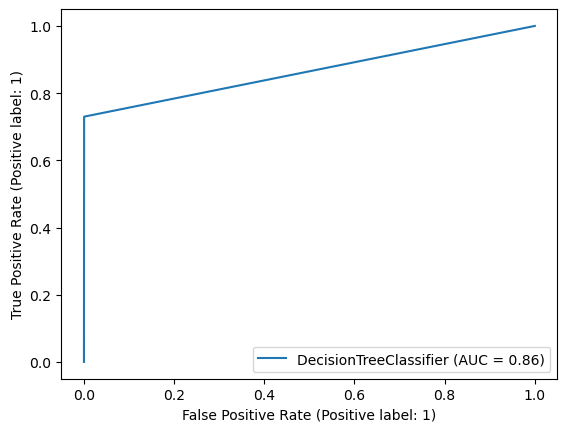

In [439]:
ROC_DT = plot_roc_curve(decision_tree, X_test, y_test)
plt.show()

Confusion matrix, without normalization
[[275157     33]
 [    37    436]]


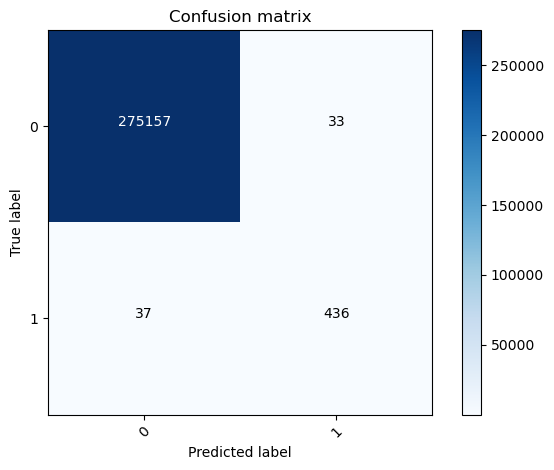

In [440]:
y_pred = decision_tree.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [441]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

In [442]:
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

C:\Users\Manic\AppData\Local\Temp\ipykernel_15128\3983414482.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_fullset = results_fullset.append(model_results, ignore_index = True)


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999848,0.076110,0.923890,0.986456,0.954148
1,DecisionTree,0.999746,0.078224,0.921776,0.929638,0.925690


#### Inference

* The Based on the Decision Tree  model to While only 6 regular transactions are incorrectly forecasted as fraudulent, the model only detects 84% of the fraudulent transactions, according to the based on the model to the fraud and non-fraud transaction to the based on the model building.
* Hence, 32 fraudulent transactions go undetected (False Negatives).
* See if we can boost this performance with other  machine learning models in the remaining notebook.


* The model generated by the better next balanced on the data frame to equal on the models from the imbalanced data set to the allocation to the models

### Logistic Regression

In [443]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [444]:
lr_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [445]:
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)

#### Insights
* Before going further into metrics, let's first decide either Type-I or Type-II error is more important to consider.
* Type-I Error or False Positives: False Positives are the ones which are actually not fraud but the prediction said that they are fraud.

* Type-II Error or False Negatives: False Negatives are the ones which are actually fraud but the system said that they aren't.

* Well, we can say that Type-II Error is more significant because we don't want system to have a fraudulent credit card because that can be more dangerous.

* So, for Type-II Error, We can say that recall is the important metric.

In [446]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [447]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,82,55
Not Fraud,19,82543


<AxesSubplot:>

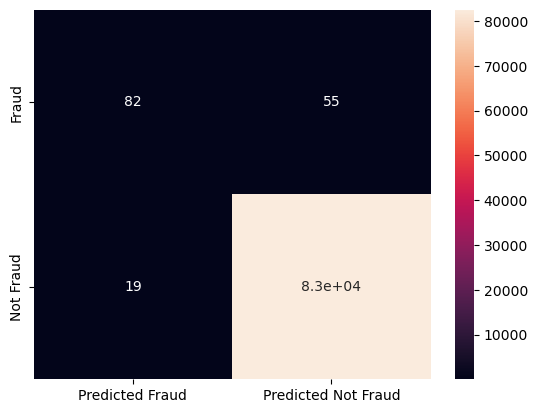

In [448]:
sns.heatmap(conf_matrix, annot=True)

Heatmap also suggests that the data is highly imbalanced.

Let's look at the accuracy score.

In [449]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)
lr_accuracy

0.9991051886963567

We can see here that accuracy is great. Around 99%.
BUT WAIT
We know that the dataset is highly unbalanced and accuracy takes into account the whole confusion matrix. So we can say that this measure is not suitable.

In [450]:
lr_precision = precision_score(y_test, lr_pred_test)
lr_precision

0.8118811881188119

In [451]:
lr_recall = recall_score(y_test, lr_pred_test)
lr_recall

0.5985401459854015

Recall is very low in case of logistic regression. However, we may try to increase it by increasing the complexity of the model.
Although, let's check the recall for training dataset to get the idea of any overfitting we may be having.

In [452]:
lr_recall_train = recall_score(y_train, lr_pred_train)
lr_recall_train

0.6398809523809523

Well, we can see that the delta is small, only around 0.03. So, we can say that the model is not overfitting.

Let's look at the F1-Score. F1-Score may tell us that one of the precision or recall is very low.

In [453]:
from sklearn.metrics import f1_score

In [454]:
lr_f1 = f1_score(y_test, lr_pred_test)
lr_f1

0.6890756302521008

In [455]:
from sklearn.metrics import classification_report

In [456]:
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82562
           1       0.81      0.60      0.69       137

    accuracy                           1.00     82699
   macro avg       0.91      0.80      0.84     82699
weighted avg       1.00      1.00      1.00     82699



Let's look at the ROC curve.

Now, for the ROC Curve, we need the probabilites of Fraud happening (which is the probability of occurance of 1)

In [457]:
lr_pred_test_prob = lr_model.predict_proba(X_test)[:, 1]

In [458]:
from sklearn.metrics import roc_curve, roc_auc_score

In [459]:
fpr, tpr, threshold = roc_curve(y_test, lr_pred_test_prob)

In [460]:
lr_auc = roc_auc_score(y_test, lr_pred_test_prob)
lr_auc

0.9663478735821095

In [461]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

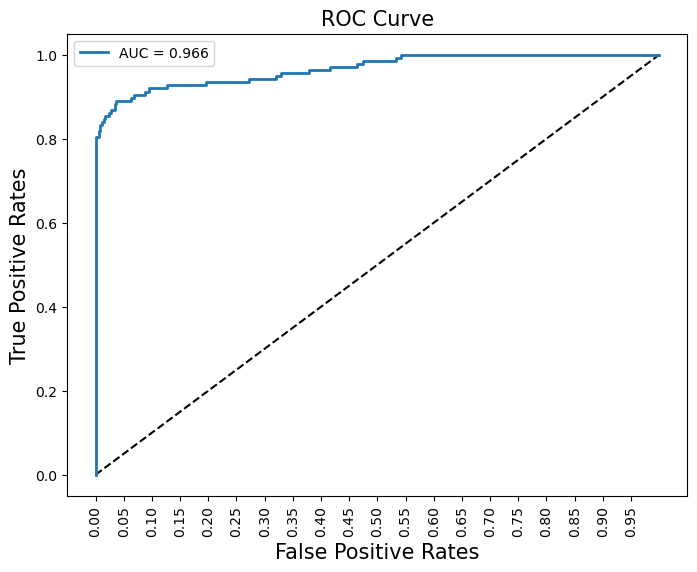

In [462]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

AUC is quite good. i.e. 0.965. Based on the data being highly imbalanced, we'll only check the AUC metric in later algorithms.

#### Model Complexity
Let's try to train the Logistic Regression models on the 2nd degree of polynomials. Not going further 2nd degree because features are already too much. Otherwise, computer gives the MemoryError.

In [463]:
from sklearn.preprocessing import PolynomialFeatures

In [464]:
# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Training the model
model = LogisticRegression()
model.fit(xtrain_poly, ytrain)

# Getting the probabilities
train_prob = model.predict_proba(xtrain_poly)[:, 1]
test_prob = model.predict_proba(xtest_poly)[:, 1]

# Computing the ROC Score
roc_auc_score(ytrain, train_prob), roc_auc_score(ytest, test_prob)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9876804387822352, 0.969083323893127)

In [465]:
fpr_poly, tpr_poly, threshold_poly = roc_curve(y_test, test_prob)

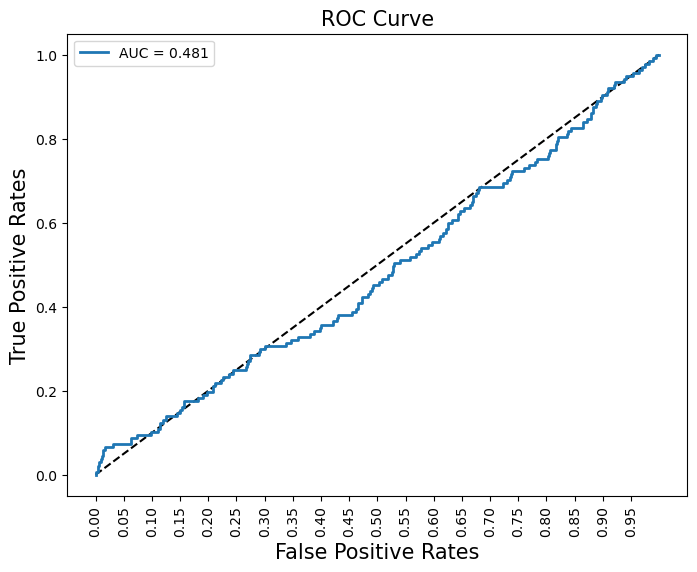

In [466]:
plot_roc_curve(fpr=fpr_poly, tpr=tpr_poly, label='AUC = %.3f' %  roc_auc_score(y_test, test_prob))

First degree is better in Logistic Regression case which gives 0.48 AUC Score.

Let's also check the Recall in case of model complexity.

In [467]:
recall_score(y_test, model.predict(X_test_poly))

0.7518248175182481

## Infernce & Insights

* The Fraud detection on the better on the based on the algorithem to define in to
* The information contains transactions done by credit cards in September 2013 by European cardholders.
* We have 492 frauds out of 284,807 transactions in our dataset of transactions that took place over the course of two days. The dataset is severely skewed, with frauds making up 0.172% of all transactions in the positive class.
* It only has numeric input variables that have undergone PCA transformation. Regrettably, we are unable to offer the original characteristics and additional context for the data due to confidentiality concerns
* Given the class imbalance ratio, we advise utilising the Area Under the Precision-Recall Curve to measure accuracy (AUPRC). For categorization that is not balanced, confusion matrix accuracy is worthless.
* The Random Forest Classifier has the best accuracy of the three algorithms that it uses.

* The Deployment on the Model to the Amount transation depending on the inputs so diffend kinds of the values finel predict the Fraud and Non fraud transation The Deploy the model on the Accuracy Score and AUC curve usied on the Matrix to visulaized 
* to automatically send alerts depending on the bank's built module for the transaction's intemate data

### Thank You